In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import edhec_risk_kit as erk

In [ ]:
rets = edhec_risk_kit.get_ffme_returns('Lo 20', 'Hi 20', 'lo20', 'hi20')
rets.head()

,lo20,hi20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [ ]:
rets.shape

(1110, 2)

In [ ]:
n_months = rets.shape[0]
rets_per_month = (rets + 1).prod()**(1/n_months) - 1
annualized_returns = (rets_per_month + 1) ** 12 - 1
annualized_returns

lo20    0.151977
hi20    0.098490
dtype: float64

In [ ]:
0.151977 * 100

15.1977

In [ ]:
annualized_vol = rets.std()*np.sqrt(12)
annualized_vol

lo20    0.336701
hi20    0.195116
dtype: float64

<AxesSubplot:>

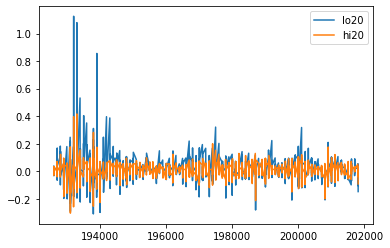

In [ ]:
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0,
                   index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 20', 'Hi 20']]
rets.columns = ['lo20', 'hi20']
rets = rets/100
rets.plot()

In [ ]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.head()

,lo20,hi20
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316


In [ ]:
rets.index = rets.index.to_period('M')
rets.head()

,lo20,hi20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [ ]:
test_period = rets['1999':'2015']
n_months = test_period.shape[0]
rets_per_month = (test_period + 1).prod()**(1/n_months) - 1
annualized_returns = (rets_per_month + 1) ** 12 - 1
annualized_returns

lo20    0.114426
hi20    0.062865
dtype: float64

In [ ]:
annualized_vol = test_period.std()*np.sqrt(12)
annualized_vol

lo20    0.228894
hi20    0.172713
dtype: float64

In [ ]:
tp_drawdown_lo = edhec_risk_kit.drawdown(test_period['lo20'])
print('Min', tp_drawdown_lo['Drawdown'].min(), tp_drawdown_lo['Drawdown'].idxmin())

Min -0.6248092431236988 2009-02


In [ ]:
tp_drawdown_hi = edhec_risk_kit.drawdown(test_period['hi20'])
print('Min: ', tp_drawdown_hi['Drawdown'].min(), tp_drawdown_hi['Drawdown'].idxmin())

Min:  -0.5527349978713653 2009-02


In [ ]:
hfi = edhec_risk_kit.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [ ]:
erk.skewness(hfi['2009':'2018']).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [ ]:
erk.kurtosis(hfi['2009':'2018']).sort_values()

CTA Global                2.591087
Merger Arbitrage          2.715238
Global Macro              3.164362
Distressed Securities     3.319725
Event Driven              3.620617
Funds Of Funds            3.816132
Long/Short Equity         4.115713
Short Selling             4.175832
Emerging Markets          4.401636
Relative Value            4.512482
Equity Market Neutral     5.071677
Fixed Income Arbitrage    6.406941
Convertible Arbitrage     6.775731
dtype: float64

In [ ]:
(np.square(hfi['2009':'2018'] - hfi['2009':'2018'].mean()).sum()/hfi['2009':'2018'].shape[0]).sort_values()

Equity Market Neutral     0.000038
Merger Arbitrage          0.000041
Fixed Income Arbitrage    0.000058
Relative Value            0.000090
Global Macro              0.000107
Funds Of Funds            0.000114
Convertible Arbitrage     0.000186
Event Driven              0.000215
Distressed Securities     0.000247
Long/Short Equity         0.000283
CTA Global                0.000390
Emerging Markets          0.000550
Short Selling             0.001167
dtype: float64

In [ ]:
shape